# Non-Periodic Signals

We have so far looked at periodic signal, r signals that repeat forever. It also means that he frequency components they contain donot change over time.  In this chapter, we consider non-periodic signals, whosefrequency componentsdochange over time. Sirens are a good example of non-periodic signals

# Linear Chirp
Chirp are signals that makes a sinusoid that sweeps linearly through a range of frequencies.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import Audio

In [37]:
sr = 1000
f = np.linspace(2,10,sr)
t = np.linspace(0,1,sr)
#x = np.sin(2*np.pi*f*t)
#plt.plot(t,x);
# RED ALERT: The Above is not correct. 

But, at what rate is the frequency changing? or how do we define the change in frequency with respect to time?<br>

**Recall**<br>
Frequency is cycles per second. Cycles can be converted to phases by multiplying frequency by $2\pi$.

**But, what is phase?**<br>
It is the number of cycles since start time expressed in radians. Each cycle is $2\pi$ radians

**Now, we want to know how much does the phase change with respect to time due to change in frequency**

In [26]:
dt = np.diff(t, prepend=0)

`np.diff` computes the difference between adjacent elements of $t$, returning the length of each interval in seconds.  If the elements of $t$ are equally spaced,the $dt$ are all the same.

When frequency is constant, the phase,$\phi$, increases linearly over time: $$\phi = 2\pi ft$$

When frequency is a function of time, the change in phase during a short time interval, $\Delta t$ is: $$\Delta \Phi = 2\pi f(t) \Delta t$$


In [27]:
dphi = 2*np.pi*f*dt

Now, since `dphi` contains the changes in phase, we can get the total phase at each timestep by adding up the changes: In other words, Phase is an integral of frequency, or frquency is derivative of phase: $$\frac{d\phi}{dt} = 2\pi f(t)$$, $$=\Phi = \int 2\pi f(t)dt$$


In [28]:
phases = np.cumsum(dphi)
phases = np.insert(phases, 0, 0)

In [29]:
x = np.sin(phases)

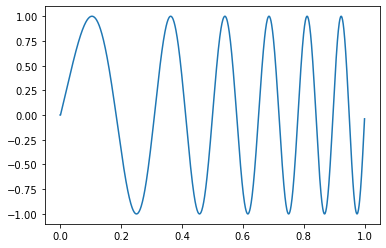

In [36]:
plt.plot(t,x[:-1])

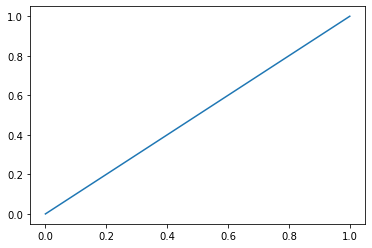

In [39]:
# plotting the change in frequency over time
plt.plot(t,t)

Lets us combine all the code above and generate the chirp sound

In [76]:
sr = 44100
t = np.linspace(0,5,sr*5)
f = np.linspace(220,880,len(t))
dt = np.diff(t, prepend=0)
dphi = 2*np.pi*f*dt
phases = np.cumsum(dphi)
phases = np.insert(phases, 0, 0)
x = np.sin(phases)
audio = Audio(data=x, rate=sr)
audio

Timestamp at which 440 is reached is 1.67 s
Timestamp at which 880 is reached is 5.00 s


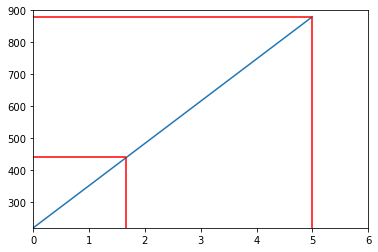

In [89]:
fig, ax = plt.subplots(1,1)
ax.plot(t,f)
indexA1end = np.where(np.logical_and(f>=440, f<=441))[0][0]
indexA2end = np.where(np.logical_and(f>=880, f<=881))[0][0]
print("Timestamp at which 440 is reached is {:.2f} s".format(t[indexA1end]))
print("Timestamp at which 880 is reached is {:.2f} s".format(t[indexA2end]))
ax.set_xlim(0,6)
ax.set_ylim(220,900)

# first hline and vline at 440
ax.hlines(y=440, xmin=0.0, xmax=t[indexA1end], color='r')
ax.vlines(x=t[indexA1end], ymin = 220 , ymax = 440, color='r')

# second hline and vline at 880
ax.hlines(y=880, xmin=0.0, xmax=t[indexA2end], color='r')
ax.vlines(x=t[indexA2end], ymin = 220 , ymax = 880, color='r');


The 220 Hz frequency we selected for the linear chirp denotes the A3 musical note and the 880 Hz frequency denotes the A5 musical note. The chirp sound that we just heard sweeps two octave from A3 to A5.

Clearly, the time taken to sweep the first octave is lower comapared to the time taken to sweep the second octave. It took $1.67s$ to finish the first octave. It took $5-1.67 = 3.33s$ to finish the second octave. Therefore it took twice the time to span the second octave compared to the time taken to sweep the first octave.

**Did we just hear linear increase in frequency or a logarithmic increase in frequency?**<br>

What we hear is a logarithmic increase in frequency, even tough the increase in frequency is linear. Let us now design a chirp which can be perceived linearly. 

# Exponential Chirp

If you want the perceived pitch to increase linearly, the frequency has to increase exponentially. A signal with that shape is called an exponential chirp.

In [77]:
sr = 44100
start, end = np.log10(220), np.log10(880)
t = np.logspace(0,5,sr*5)
f_l = np.logspace(start, end, len(t))
dt = np.diff(t, prepend=0)
dphi = 2*np.pi*f_l*dt
phases = np.cumsum(dphi)
phases = np.insert(phases, 0, 0)
x = np.sin(phases)
audio = Audio(data=x, rate=sr)
audio

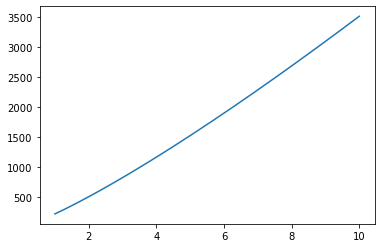

In [67]:
fig, ax = plt.subplots(1,1)
ax.plot(t,f_l)

# Spectrum of Chirp

In [78]:
def spectrum(signal, sr):
    A = np.fft.fft(signal, norm="backward")
    F = np.fft.fftfreq(signal.shape[0], d=1/sr)
    A = np.abs(A)
    return F[0:sr//2], A[0:sr//2]

(0.0, 1200.0)

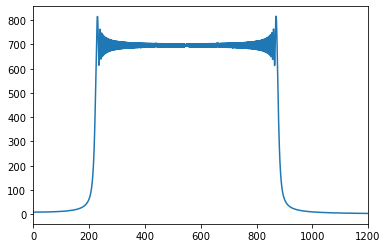

In [79]:
# linear chirp
sr = 16000
t = np.linspace(0,5,sr*5)
f = np.linspace(220,880,len(t))
dt = np.diff(t, prepend=0)
dphi = 2*np.pi*f*dt
phases = np.cumsum(dphi)
phases = np.insert(phases, 0, 0)
x = np.sin(phases)
F,A = spectrum(x, sr)
plt.plot(F,A)
plt.xlim(0,1200)

(0.0, 1200.0)

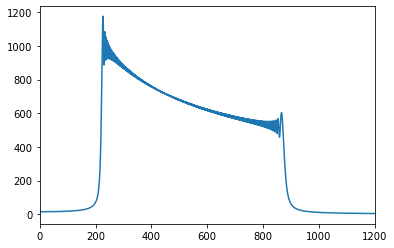

In [80]:
sr = 16000
start, end = np.log10(220), np.log10(880)
t = np.linspace(0,5,sr*5)
f_l = np.logspace(start, end, len(t))
dt = np.diff(t, prepend=0)
dphi = 2*np.pi*f_l*dt
phases = np.cumsum(dphi)
phases = np.insert(phases, 0, 0)
x = np.sin(phases)
F,A = spectrum(x, sr)
plt.plot(F,A)
plt.xlim(0,1200)

All this is good, but at this stage we have no idea how frequency and time are related? In the enxt chapter, we will be looking at Spectogram to recover the relationship between frequency and time.